In [1]:
import pandas
import numpy
import glob
import os
import imageio
import subprocess

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
dat = "_data/"

In [ ]:
fls = []
for subdir, _, files in os.walk(dat):  
    if files:
        for fl in files:
            if "images.npy" not in fl and "foo.zip" not in fl:
                fls.append(subdir + "/" + fl)

In [ ]:
for i in range(0, len(fls), 3):
    if "cCy3" not in fls[i]:
        continue
    triple = fls[i : i + 3]
    fixes = triple[0].split("_cCy3", 1)
    outfl = "".join(fixes)
    if any(fixes[0] not in x for x in triple):
        print("Could not match three files for: {}".format(prefix))
    subprocess.call(["convert", triple[0], triple[1], triple[2], "-quality", "100%", "-combine", outfl])
    subprocess.call(["rm", triple[0], triple[1], triple[2]])

In [6]:
fls = []
for subdir, _, files in os.walk(dat):  
    if files:
        for fl in files:
            if "images.npy" not in fl and "foo.zip" not in fl:
                fls.append(subdir + "/" + fl)

In [7]:
fls[:5]

['_data/KB03-2C/HCS_IMAGE_CONTAINER_RAW/20110909215632109-886770/bKB03-2C_wI23_s5_z1_t1_u001.png',
 '_data/KB03-2C/HCS_IMAGE_CONTAINER_RAW/20110909215632109-886770/bKB03-2C_wM20_s6_z1_t1_u001.png',
 '_data/KB03-2C/HCS_IMAGE_CONTAINER_RAW/20110909215632109-886770/bKB03-2C_wG10_s4_z1_t1_u001.png',
 '_data/KB03-2C/HCS_IMAGE_CONTAINER_RAW/20110909215632109-886770/bKB03-2C_wI16_s3_z1_t1_u001.png',
 '_data/KB03-2C/HCS_IMAGE_CONTAINER_RAW/20110909215632109-886770/bKB03-2C_wP17_s1_z1_t1_u001.png']

In [10]:
fls_small = []
for fl in fls:
    flm = fl.replace(".png", "small.png")
    fls_small.append(flm)
    subprocess.call(["convert", fl, "-resize", "100x75", flm])

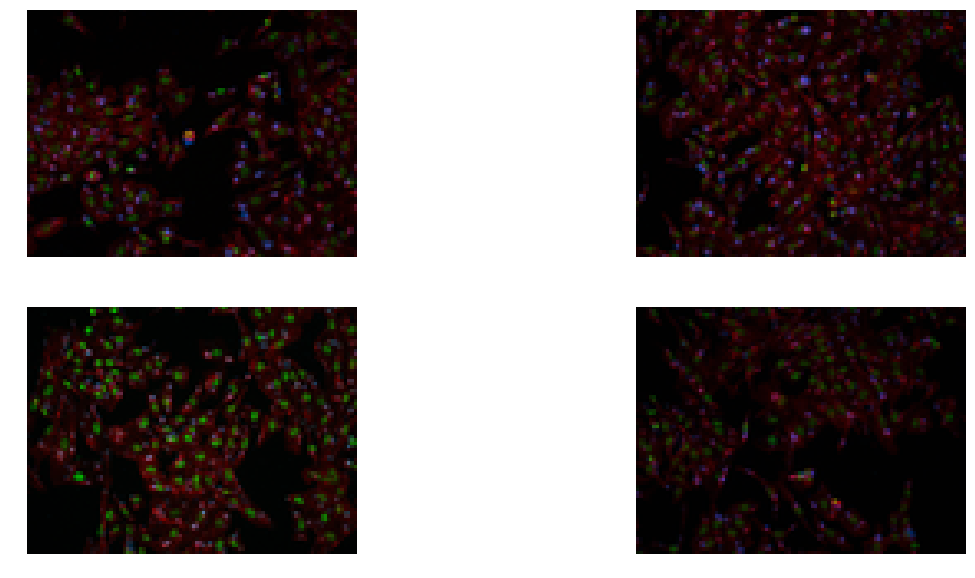

In [11]:
f,ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
for i in range(2):
    for j in range(2):
        image = mpimg.imread(fls_small[i * 2 + j])
        ax[i][j].imshow(image)
        ax[i][j].axis('off')
plt.show()

In [19]:
large_files = imageio.imread(fls[0])
small_files = imageio.imread(fls_small[0])
nrow, ncol, nchan = large_files.shape
nrow_s, ncol_s, nchan_s = small_files.shape

In [20]:
X = numpy.zeros(shape=(len(fls), nrow, ncol, nchan))

In [21]:
X_small = numpy.zeros(shape=(len(fls_small), nrow_s, ncol_s, nchan_s))

In [22]:
X.shape

(9232, 149, 200, 3)

In [23]:
X_small.shape

(9232, 75, 100, 3)

In [26]:
els = []
for i, x in enumerate(fls):
    try:
        im = imageio.imread(x)
        if im.shape == (149, 200, 3):        
            X[i] = im
        else:
            els.append(i)
    except Exception as e:
        print(str(e))
els = []

Could not find a format to read the specified file in mode 'i'


In [30]:
for i, x in enumerate(fls_small):
    try:
        im = imageio.imread(x)
        if im.shape == (75, 100, 3):        
            X_small[i] = im
        else:
            els.append(i)        
    except Exception as e:
        print(str(e))
els = []

Could not find a format to read the specified file in mode 'i'


In [31]:
numpy.save("_data/images.npy", X)
numpy.save("_data/images_small.npy", X_small)

In [32]:
X = numpy.load("_data/images.npy")
X_small = numpy.load("_data/images_small.npy")

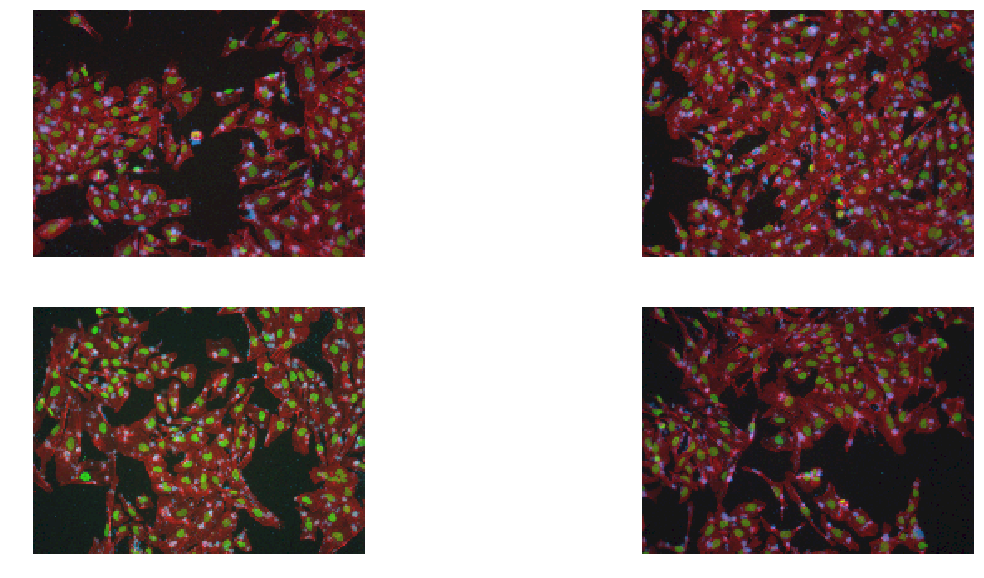

In [34]:
f,ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
for i in range(2):
    for j in range(2):
        ax[i][j].imshow(X[i * 2 + j]/255)
        ax[i][j].axis('off')
plt.show()

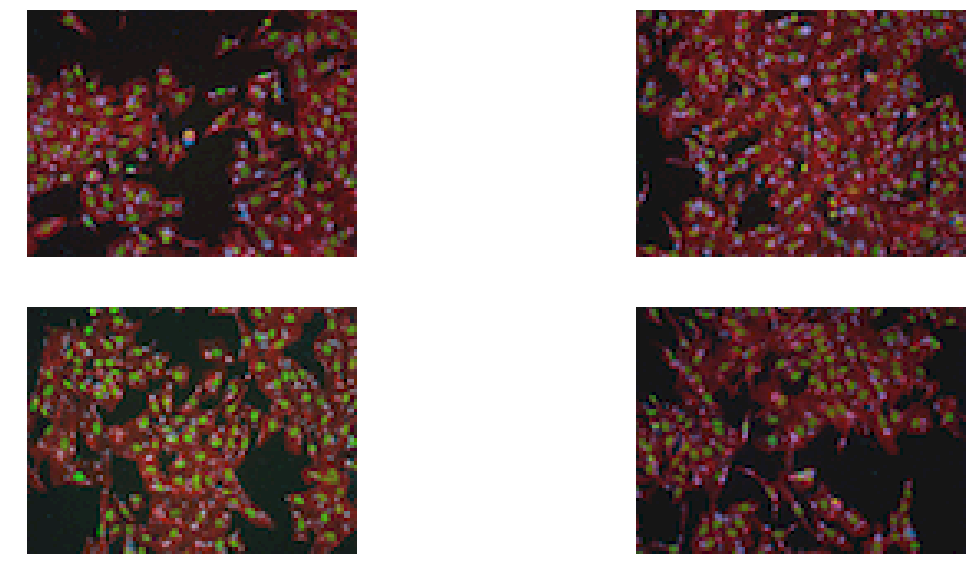

In [35]:
f,ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
for i in range(2):
    for j in range(2):
        ax[i][j].imshow(X_small[i * 2 + j]/255)
        ax[i][j].axis('off')
plt.show()